In [1]:
from bs4 import BeautifulSoup

In [2]:
from newspaper import Article

url = 'https://n.news.naver.com/mnews/article/029/0002766294?sid=104'

article = Article(url,language='ko')
article.download()
article.parse()

In [3]:
print(article.title)

트위터서 밤새며 일하는 머스크 "테슬라 일도 한다"


In [4]:
print(article.text)

소셜미디어 트위터를 인수한 테슬라 최고경영자(CEO) 일론 머스크가 트위터 업무에 집중해 테슬라 경영을 소홀히 한다는 지적을 의식한 듯 "트위터 일과 함께 테슬라 업무도 봤다"는 트윗을 올렸다. 그러면서 "이번주 중 테슬라 업무도 챙겨보겠다"고 밝혔다.14일(현지시간) 블룸버그통신에 따르면 머스크는 자신을 고문하듯 일주일 내내 트위터 업무를 하고 있다고 말했다. 인도네시아 발리에서 주요 20개국 정상회의(G20)와 함께 진행된 기업인 회의인 비즈니스20 서밋(B20)에 화상으로 참석해서 한 말이다.머스크는 "내가 처리해야 할 일이 너무 많다. 할 수 있는 한 최대한 일을 하고 있다"면서 "아침부터 저녁까지 일주일에 7일을 일한다. 솔직히 말해 나 자신을 고문하는 정도는 극단적인 수준"이라고 밝혔다.그는 B20 회의 이후에는 트위터에 글을 올려 트위터 본사에서 밤을 샜고 조직이 고쳐질 때까지 회사에서 일하고 잠잘 것이라고 밝혔다. 한편 머스크가 트위터를 인수한 후 회사 내부에서는 '직원들을 24시간 일하는 로봇으로 취급한다'는 등의 비판이 쏟아지고 있다.


In [5]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code1, code2, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm'+'&sid2='+str(code2)+'&sid1='+str(code1)+'&date='+str(date)+'&page='+str(i)
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
    news = requests.get(url, headers=headers)

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [6]:
url_list = make_urllist(3,105,226,'20230406')
print('뉴스 기사의 개수: ',len(url_list))
url_list

뉴스 기사의 개수:  60


['https://n.news.naver.com/mnews/article/009/0005112558?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005457628?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005457622?sid=105',
 'https://n.news.naver.com/mnews/article/003/0011788003?sid=105',
 'https://n.news.naver.com/mnews/article/030/0003089282?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013864204?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005457578?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005457566?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002287988?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005457564?sid=105',
 'https://n.news.naver.com/mnews/article/008/0004871717?sid=105',
 'https://n.news.naver.com/mnews/article/009/0005112496?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013863971?sid=105',
 'https://n.news.naver.com/mnews/article/003/0011787753?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002287972?sid=105',
 'https://

In [7]:
url_list[:5]

['https://n.news.naver.com/mnews/article/009/0005112558?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005457628?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005457622?sid=105',
 'https://n.news.naver.com/mnews/article/003/0011788003?sid=105',
 'https://n.news.naver.com/mnews/article/030/0003089282?sid=105']

In [8]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}
idx2word2 = {'731' : '모바일', '226' : '인터넷/SNS', '227' : '통신/뉴미디어', '230' : 'IT 일반', '732' : '보안/해킹', '283' : '컴퓨터'}

In [9]:
from newspaper import Article

def make_data(urllist,code1,code2):
    text_list = []
    for url in urllist:
        article = Article(url,language='ko')
        article.download()
        article.parse()
        text_list.append(article.text)
    df = pd.DataFrame({'news':text_list})
    df['code1'] = idx2word[str(code1)]
    df['code2'] = idx2word2[str(code2)]
    return df

In [10]:
data = make_data(url_list,105,283)
data

,news,code1,code2
0,산돌은 네덜란드 폰트 회사 티포텍(Typotheque)과의 협업을 통해 데바나가리 ...,IT/과학,컴퓨터
1,지난 5일 강남구 빗썸 본사에서 이상천 대한적십자사 사무총장(사진 왼쪽 세 번째)과...,IT/과학,컴퓨터
2,[이데일리 함정선 기자] 국내 OTT 등 디지털 미디어의 경쟁력을 높이기 위해 삼성...,IT/과학,컴퓨터
3,"기사내용 요약 박윤규 과기정통부 차관, 디지털 국정과제 간담회\n\n""해외IT지원센...",IT/과학,컴퓨터
4,'가디언즈 오브 갤럭시' 시리즈 최초\n\n감독 제임스 건·주연배우 크리스 프랫 등...,IT/과학,컴퓨터
5,\n\n[네이버 캡처. 재판매 및 DB 금지] [네이버 캡처. 재판매 및 DB 금지...,IT/과학,컴퓨터
6,[이데일리 김현아 기자]네이버 스마트스토어를 운영하는 중소상공인(SME)과 네이버 ...,IT/과학,컴퓨터
7,[이데일리 김현아 기자]네이버(대표이사 최수연)가 전국의 중소상공인(SME)과 지자...,IT/과학,컴퓨터
8,(사진=지디넷코리아)\n\n(사진=지디넷코리아)\n\n작년 말부터 두드러진 배달앱 ...,IT/과학,컴퓨터
9,[이데일리 김현아 기자]국내 대표 협업툴 ‘플로우’를 서비스하는 마드라스체크(대표 ...,IT/과학,컴퓨터


# 16-8. 네이버 뉴스 기사 크롤링 (3) 데이터 수집 및 전처리

In [11]:
code_list = [[102,250],[103,243],[105,283]]
idx2word2 = {'731' : '모바일', '226' : '인터넷/SNS', '227' : '통신/뉴미디어', '230' : 'IT 일반', '732' : '보안/해킹', '283' : '컴퓨터', '250' : '교육', '243' : '책'}
code_list

[[102, 250], [103, 243], [105, 283]]

In [12]:
from multiprocessing import Pool
import random
import time,os


def make_total_data(page_num,code_list,date):
    start = int(time.time()) #시작을 만든다.
    num_cores = 4
    df = None
    for code1,code2 in code_list:
        pool = Pool(num_cores)
        url_list = make_urllist(page_num,code1,code2,date)
        df_temp = make_data(url_list,code1,code2)
        print(str(code1)+'번:'+str(code2)+'번'+' 코드에 대한 데이터를 만들었습니다.')
        pool.close()
        pool.join()
        time.sleep(random.randint(0,1))
        if df is not None:
            df = pd.concat([df,df_temp])
        else:
            df = df_temp
    print("***run time(sec) : ",int(time.time())-start)
    return df

In [13]:
df = make_total_data(1,code_list,20230406)

102번:250번 코드에 대한 데이터를 만들었습니다.
103번:243번 코드에 대한 데이터를 만들었습니다.
105번:283번 코드에 대한 데이터를 만들었습니다.
***run time(sec) :  22


In [14]:
print(len(df))

60


In [15]:
df.sample(10)

,news,code1,code2
3,메가존 계열 나임네트웍스가 클라우드 통합운영 관리 플랫폼 '탱고'를 통해 글로벌 시...,IT/과학,컴퓨터
11,소도 뛰고 개도 뛰고 소방관도 뛰고!이보다 시골 소방관의 삶을 단 한 번에 나타낼 ...,생활/문화,책
1,아이들은 금방 친해진다고들 말한다. 놀이터에서 처음 만난 사이라도 어느새 함께 놀고...,생활/문화,책
18,구글.(사진=씨넷)\n\n구글이 자체 개발 중인 인공지능(AI)용 슈퍼 컴퓨터 'T...,IT/과학,컴퓨터
12,배동현 BDH재단 이사장. (사진=한국외대 제공)\n\n[이데일리 김형환 기자] 한...,사회,교육
15,\n\n[연합뉴스 자료사진] [연합뉴스 자료사진]\n\n(청주=연합뉴스) 김형우 기...,사회,교육
9,대구대 조형예술대학 패션학부가 ㈜올댓뷰티아카데미와 상호교류 협약을 체결했다. 협약을...,사회,교육
13,(청주=뉴스1) 이성기 기자 = 충북 청주교육지원청(교육장 박재환) 특수교육지원센터...,사회,교육
13,OCR API (사진=업스테이지)\n\n(사진=업스테이지)\n\n업스테이지(대표 김...,IT/과학,컴퓨터
15,[디지털데일리 박세아 기자] 글로벌 블록체인 전문가들이 토큰증권(이하 ST) 국내 ...,IT/과학,컴퓨터


In [16]:
df = make_total_data(10, code_list, 20230406)

102번:250번 코드에 대한 데이터를 만들었습니다.
103번:243번 코드에 대한 데이터를 만들었습니다.
105번:283번 코드에 대한 데이터를 만들었습니다.
***run time(sec) :  170


In [18]:
import os
csv_path = './data/news_data.csv'
df.to_csv(csv_path,index=False)

if os.path.exists(csv_path):
    print('file saved!')

file saved!


# 16-9. 네이버 뉴스 기사 크롤링 (4) 데이터 전처리

In [85]:
import pandas as pd
df = pd.read_csv('./data/news_data.csv',sep=',')
df.head()

,news,code1,code2
0,컨선월드와이드 한국(대표 이준모)과 아주대학교 국제대학원(원장 장병윤)은 지난 4일...,사회,교육
1,"핵심요약 종로학원, 지난해 4월 말 학교알리미 공시자료 통해 전체 320고교의 학폭...",사회,교육
2,\n\n[연합뉴스 자료사진] [연합뉴스 자료사진]\n\n\n\n[연합뉴스 자료사진]...,사회,교육
3,[서울경제]장제국(사진) 동서대 총장이 한국대학교육협의회(대교협) 제27대 회장으로...,사회,교육
4,[헤럴드경제 도현정 기자]이대한 성균관대 생명과학과 교수가 현대 유전학의 성과를 통...,사회,교육


In [86]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",regex=True)
df['news']

0      컨선월드와이드 한국대표 이준모과 아주대학교 국제대학원원장 장병윤은 지난 일 아주대학...
1      핵심요약 종로학원 지난해 월 말 학교알리미 공시자료 통해 전체 고교의 학폭 심의건수...
2      연합뉴스 자료사진 연합뉴스 자료사진연합뉴스 자료사진 연합뉴스 자료사진수원연합뉴스 최...
3      서울경제장제국사진 동서대 총장이 한국대학교육협의회대교협 제대 회장으로 취임한다대교협...
4      헤럴드경제 도현정 기자이대한 성균관대 생명과학과 교수가 현대 유전학의 성과를 통해 ...
                             ...                        
469    로그프레소 로고로그프레소가 보안 운영 플랫폼 전문 기술력과 사업성을 인정받아 억원 ...
470    한국정보보호학회와 한국인터넷진흥원은 오는 일과 일 이틀 간 코엑스에서 온오프라인으로...
471    디지털 기술 활성화로 데이터 수요가 급증하면서 전기먹는 하마 데이터센터가 기업 경쟁...
472    는 경쟁력 있는 국내 기업들의 상호협력과 전략적 연대를 이끌어낼 협의체가 필요하다는...
473    일현지시간 미국 증시가 인플레이션과 미 연준의 금리 불확실성 보다는 경기침체로 확연...
Name: news, Length: 474, dtype: object

In [87]:
print(df.isnull().sum())

news     0
code1    0
code2    0
dtype: int64


In [88]:
df.drop_duplicates(subset=['news'],inplace=True)
print(len(df))

268


In [89]:
from matplotlib import font_manager 
for i in font_manager.fontManager.ttflist: 
    if 'Nanum' in i.name: 
        print(i.name, i.fname)

Nanum Pen Script OTF /Library/Fonts/NanumPen.otf
NanumBarunGothicOTF /Library/Fonts/NanumBarunGothic.otf
NanumSquareOTF /Library/Fonts/NanumSquareOTFExtraBold.otf
NanumSquareOTF /Library/Fonts/NanumSquareOTFLight.otf
NanumBarunGothicOTF /Library/Fonts/NanumBarunGothicBold.otf
NanumBarunGothicOTF /Library/Fonts/NanumBarunGothicUltraLight.otf
Nanum Brush Script OTF /Library/Fonts/NanumBrush.otf
NanumMyeongjoOTF /Library/Fonts/NanumMyeongjo.otf
NanumGothicOTF /Library/Fonts/NanumGothic.otf
NanumBarunpen /Library/Fonts/NanumBarunpenBold.otf
NanumGothicOTF /Library/Fonts/NanumGothicLight.otf
NanumMyeongjoOTF /Library/Fonts/NanumMyeongjoExtraBold.otf
NanumSquareRoundOTF /Library/Fonts/NanumSquareRoundOTFR.otf
NanumSquareRoundOTF /Library/Fonts/NanumSquareRoundOTFEB.otf
NanumSquareOTF /Library/Fonts/NanumSquareOTFRegular.otf
NanumGothicOTF /Library/Fonts/NanumGothicBold.otf
NanumGothicOTF /Library/Fonts/NanumGothicExtraBold.otf
NanumSquareOTF /Library/Fonts/NanumSquareOTFBold.otf
NanumSquareR

<AxesSubplot:title={'center':'한글 제목입니다.'}>

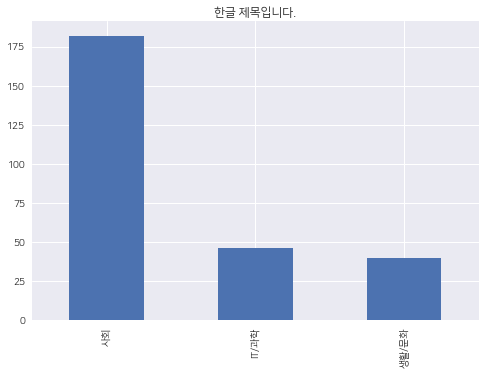

In [90]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn')
plt.rcParams["font.family"] = "NanumSquareOTF"
plt.title("한글 제목입니다.")
df['code1'].value_counts().plot(kind='bar')

In [91]:
df.groupby('code1').size().reset_index(name='count')

,code1,count
0,IT/과학,46
1,사회,182
2,생활/문화,40


In [92]:
df.groupby('code1').size().reset_index(name='count')

,code1,count
0,IT/과학,46
1,사회,182
2,생활/문화,40


In [93]:
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '컨선월드와이드 한국대표 이준모과 아주대학교 국제대학원원장 장병윤은 지난 일 아주대학교 국제대학원에서 글로벌 인재 양성을 위한 업무협약을 체결했다아주대학교 국제대학원은 년 설립 이래 글로벌 인재 양성을 위해 꾸준히 노력해 오고 있으며 전 세계 개국에서 여 명 이상의 동문을 배출했다 지난 년에는 한국국제협력단이 주관하는 아시아 시민사회 리더십에 선정돼 아시아 주요 개도국 출신의 연수생들을 선발해 시민사회학 분야의 리더들로 훈련시키고 있다이번 약정 체결을 통해 컨선월드와이드 한국과 아주대학교 국제대학원은 글로벌 전문가 양성 및 배출을 위해 힘쓸 예정이며 주로 해외 인적 네트워크 활용 및 학생들의 현장 실습 참여 기회 제공 등의 분야에서 협력을 이어갈 계획이다컨선월드와이드 한국 이준모 대표는 국제학의 선구자이자 글로벌 인재양성에 앞장서고 있는 아주대학교 국제대학원과 협력할 수 있게 되어 영광이다며 한국 사회에서 글로벌 리더들을 배출하는 의미 있는 활동에 컨선월드와이드가 적극 협력하고자 한다고 전했다장병윤 아주대학교 국제대학원장은 국제인도주의 단체인 컨선월드와이드와의 협력은 아주대학교 국제대학원에 중요한 의미가 있다며 학생들의 국제화 활동 기아 및 빈곤 이슈에 대한 전문적 교육 기획 제공 등 교육적인 측면에서의 성장을 기대한다고 협약의 소감을 밝혔다한편 컨선월드와이드 한국지부는 년에 설립되어 한국 사회 내 인도주의 현장의 상황을 알리고 이를 위한 모금 활동을 꾸준히 해오고 있다 최근 튀르키예 지진 긴급대응에도 투입되는 등 국제개발 및 인도적 지원 활동을 전문적으로 이어오고 있다'

tokenized_text = tokenizer.morphs(kor_text)
print(tokenized_text)

['컨', '선', '월드', '와이드', '한국', '대표', '이준모', '과', '아주', '대학교', '국제', '대학원', '원장', '장병윤', '은', '지난', '일', '아주', '대학교', '국제', '대학원', '에서', '글로벌', '인재', '양성', '을', '위한', '업무', '협약', '을', '체결', '했', '다', '아주', '대학교', '국제', '대학원', '은', '년', '설립', '이래', '글로벌', '인재', '양성', '을', '위해', '꾸준히', '노력', '해', '오', '고', '있', '으며', '전', '세계', '개국', '에서', '여', '명', '이상', '의', '동문', '을', '배출', '했', '다', '지난', '년', '에', '는', '한국', '국제', '협력', '단', '이', '주관', '하', '는', '아시아', '시민', '사회', '리더십', '에', '선정', '돼', '아시아', '주요', '개도국', '출신', '의', '연수생', '들', '을', '선발', '해', '시민', '사회학', '분야', '의', '리더', '들', '로', '훈련', '시키', '고', '있', '다', '이번', '약정', '체결', '을', '통해', '컨', '선', '월드', '와이드', '한국', '과', '아주', '대학교', '국제', '대학원', '은', '글로벌', '전문가', '양성', '및', '배출', '을', '위해', '힘쓸', '예정', '이', '며', '주로', '해외', '인', '적', '네트워크', '활용', '및', '학생', '들', '의', '현장', '실습', '참여', '기회', '제공', '등', '의', '분야', '에서', '협력', '을', '이', '어', '갈', '계획', '이', '다', '컨', '선', '월드', '와이드', '한국', '이준모', '대표', '는', '국제', '학', '의', '선구자', '이

In [94]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [95]:
def preprocessing(data):
    tokenized_text = []
    for sentence in data:
        tokens = tokenizer.morphs(sentence)
        tokens_list = [token for token in tokens if token not in stopwords]
        tokenized_text.append(tokens_list)  
    tokenized_text = list(map(' '.join,tokenized_text)) #공백을 기준으로 다시 연결시켜주기
    return tokenized_text

In [96]:
text_data = preprocessing(df['news'])

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [98]:
X_train,X_test,y_train,y_test = train_test_split(text_data,df['code1'],random_state=0)

In [99]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts)

  (0, 333)	1
  (0, 5349)	1
  (0, 1569)	1
  (0, 5974)	2
  (0, 935)	1
  (0, 617)	2
  (0, 1572)	1
  (0, 3071)	1
  (0, 6992)	1
  (0, 5517)	2
  (0, 5727)	2
  (0, 5848)	2
  (0, 4151)	2
  (0, 5725)	3
  (0, 615)	6
  (0, 526)	3
  (0, 5692)	4
  (0, 2988)	4
  (0, 2441)	6
  (0, 3386)	1
  (0, 5107)	1
  (0, 5424)	2
  (0, 4378)	1
  (0, 880)	1
  (0, 2821)	4
  :	:
  (200, 6139)	2
  (200, 4035)	1
  (200, 1670)	1
  (200, 4111)	1
  (200, 3390)	1
  (200, 5408)	1
  (200, 853)	1
  (200, 6924)	1
  (200, 1861)	1
  (200, 4226)	2
  (200, 2646)	1
  (200, 3588)	1
  (200, 1483)	1
  (200, 7011)	2
  (200, 4439)	1
  (200, 3207)	1
  (200, 5883)	1
  (200, 1234)	1
  (200, 845)	1
  (200, 5977)	1
  (200, 2643)	1
  (200, 2533)	1
  (200, 6042)	1
  (200, 1713)	1
  (200, 1213)	1


In [100]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 5)	1
  (0, 2)	1
  (0, 4)	1
  (0, 1)	1
  (0, 0)	1
  (1, 5)	1
  (1, 2)	1
  (1, 4)	1
  (1, 0)	2
  (1, 3)	1


In [109]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [110]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [111]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [112]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [113]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [114]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       IT/과학       1.00      0.07      0.13        14
          사회       0.65      1.00      0.79        43
       생활/문화       0.00      0.00      0.00        10

    accuracy                           0.66        67
   macro avg       0.55      0.36      0.31        67
weighted avg       0.63      0.66      0.53        67



/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_